In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip
/kaggle/input/weather-data-in-new-york-city-2016/weather_data_nyc_centralpark_2016(1).csv


# Data load

In [2]:
train=pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/train.zip")
test=pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/test.zip")

In [3]:
weather = pd.read_csv("../input/weather-data-in-new-york-city-2016/weather_data_nyc_centralpark_2016(1).csv")
weather.head(30)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
5,6-1-2016,41,25,33.0,0.00,0.0,0
6,7-1-2016,46,31,38.5,0.00,0.0,0
7,8-1-2016,46,31,38.5,0.00,0.0,0
8,9-1-2016,47,40,43.5,T,0.0,0
9,10-1-2016,59,40,49.5,1.80,0.0,0


In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print(sorted(weather['precipitation'].unique()))
print(sorted(weather['snow fall'].unique()))
print(sorted(weather['snow depth'].unique()))

['0', '0.00', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.11', '0.12', '0.14', '0.15', '0.16', '0.18', '0.19', '0.2', '0.20', '0.22', '0.23', '0.24', '0.25', '0.29', '0.30', '0.31', '0.32', '0.35', '0.38', '0.39', '0.4', '0.40', '0.44', '0.45', '0.47', '0.49', '0.5', '0.53', '0.54', '0.55', '0.56', '0.61', '0.62', '0.66', '0.68', '0.73', '0.82', '0.83', '0.91', '1', '1.01', '1.08', '1.09', '1.11', '1.22', '1.41', '1.65', '1.80', '1.81', '2.2', '2.31', 'T']
['0', '0.0', '0.1', '0.2', '0.4', '0.5', '1.4', '2.5', '2.8', '27.3', 'T']
['0', '1', '17', '19', '2', '22', '4', '6', '9', 'T']


# Variable assignment and column drop

Formula definitions

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
from math import radians, cos, sin, asin, sqrt

In [8]:
# Haversine formula for distance

def haversine(row):
    lon1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    lon2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6369 * c
    return km

In [9]:
# Direction formula
def ft_degree(row):
    lon1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    lon2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']
    km = 6369
    lon_delta_rad = np.radians(lon2 - lon1)
    lat1, lon1, lat2, lon2 = map(np.radians, (lat1, lon1, lat2, lon2))
    y = np.sin(lon_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lon_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [10]:
# manhattan distance
# def manhattan(row):
#     lon1 = row['pickup_longitude']
#     lat1 = row['pickup_latitude']
#     lon2 = row['dropoff_longitude']
#     lat2 = row['dropoff_latitude']
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1
#     a = sin(dlon/2)**2
#     c = 2 * asin(sqrt(a))
#     lon_dist = 6369 * c
#     a = sin(dlat/2)**2
#     c = 2 * asin(sqrt(a))
#     lat_dist = 6369 * c
#     km = abs(lat_dist) + abs(lon_dist)
#     return km

In [11]:
#Rush Hour Formula
#NYC Rush Hour reference from Staten Island Ferry Schedule
#6am - 10am Morning Rush
#10am - 4pm Day
#4pm - 8pm Evening Rush
#8pm - 6am Night
def rush_hour_f(row):
    rhour = row['real_hour']
    if (6 <= rhour) & (rhour <= 10):
        return 1
    if (10 < rhour) & (rhour < 16):
        return 2
    if (16 <= rhour) & (rhour <= 20):
        return 3
    return 0

In [12]:
weather.head(20)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
5,6-1-2016,41,25,33.0,0.00,0.0,0
6,7-1-2016,46,31,38.5,0.00,0.0,0
7,8-1-2016,46,31,38.5,0.00,0.0,0
8,9-1-2016,47,40,43.5,T,0.0,0
9,10-1-2016,59,40,49.5,1.80,0.0,0


In [13]:
weather['precipitation'] = pd.to_numeric(weather['precipitation'], errors='coerce')
weather['snow fall'] = pd.to_numeric(weather['snow fall'], errors='coerce')
weather['snow depth'] = pd.to_numeric(weather['snow depth'], errors='coerce')
weather = weather.fillna(0)

In [14]:
weather.head(20)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0.0
1,2-1-2016,40,32,36.0,0.00,0.0,0.0
2,3-1-2016,45,35,40.0,0.00,0.0,0.0
3,4-1-2016,36,14,25.0,0.00,0.0,0.0
4,5-1-2016,29,11,20.0,0.00,0.0,0.0
5,6-1-2016,41,25,33.0,0.00,0.0,0.0
6,7-1-2016,46,31,38.5,0.00,0.0,0.0
7,8-1-2016,46,31,38.5,0.00,0.0,0.0
8,9-1-2016,47,40,43.5,0.00,0.0,0.0
9,10-1-2016,59,40,49.5,1.80,0.0,0.0


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 366 non-null    object 
 1   maximum temperature  366 non-null    int64  
 2   minimum temperature  366 non-null    int64  
 3   average temperature  366 non-null    float64
 4   precipitation        366 non-null    float64
 5   snow fall            366 non-null    float64
 6   snow depth           366 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


Train

In [16]:
#Drop outliers
train = train[(train.trip_duration < 1000000)]
train = train[train['pickup_longitude'].between(-75, -73)]
train = train[train['pickup_latitude'].between(40, 42)]
train = train[train['dropoff_longitude'].between(-75, -73)]
train = train[train['dropoff_latitude'].between(40, 42)]
duration = train['trip_duration']
train['trip_duration'] = np.log(train['trip_duration'].values)

In [17]:
#encoding binary categorical
#train = pd.concat([train, pd.get_dummies(train['store_and_fwd_flag'])], axis=1)
#test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

#train.drop(['store_and_fwd_flag'], axis=1, inplace=True)
#test.drop(['store_and_fwd_flag'], axis=1, inplace=True)

#train = pd.concat([train, pd.get_dummies(train['vendor_id'])], axis=1)
#test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

#train.drop(['vendor_id'], axis=1, inplace=True)
#test.drop(['vendor_id'], axis=1, inplace=True)

#no var in test
train.drop(['dropoff_datetime'], axis=1, inplace=True)
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346


In [18]:
#Rush hour formula takes a moment ~30s
#old
#trainX = train.drop(columns=['id', 'vendor_id','trip_duration'])
#trainY = train[['trip_duration']]

encoder.fit(train['store_and_fwd_flag'])
train['store_and_fwd_flag'] = encoder.transform(train['store_and_fwd_flag'])

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['month'] = train['pickup_datetime'].dt.month
train['week'] = train['pickup_datetime'].dt.week
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute
train['minute_of_day'] = train['hour'] * 60 + train['minute']
train['real_hour'] = train['minute_of_day'] / 60

train['rush_hour'] = train.apply(rush_hour_f, axis=1)
train['is_weekend'] = train['weekday'] > 4
encoder.fit(train['is_weekend'])
train['is_weekend'] = encoder.transform(train['is_weekend'])

#for weather
train['year'] = train['pickup_datetime'].dt.year
train['day'] = train['pickup_datetime'].dt.day

train.drop(['minute'], axis=1, inplace=True)
train.drop(['hour'], axis=1, inplace=True)
train.drop(['pickup_datetime'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [19]:
weather["date"] = pd.to_datetime(weather["date"])
weather['year'] = weather['date'].dt.year
weather_2016 = weather[weather["year"] == 2016]
weather_2016.drop(["year"], axis=1, inplace=True)

train['date']=pd.to_datetime(train[['year','month','day']],errors='coerce')
left_merge = pd.merge(left=train, right=weather_2016, on="date", how="left")
train = left_merge.loc[:, left_merge.columns != 'date']

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458593 entries, 0 to 1458592
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1458593 non-null  object 
 1   vendor_id            1458593 non-null  int64  
 2   passenger_count      1458593 non-null  int64  
 3   pickup_longitude     1458593 non-null  float64
 4   pickup_latitude      1458593 non-null  float64
 5   dropoff_longitude    1458593 non-null  float64
 6   dropoff_latitude     1458593 non-null  float64
 7   store_and_fwd_flag   1458593 non-null  int64  
 8   trip_duration        1458593 non-null  float64
 9   month                1458593 non-null  int64  
 10  week                 1458593 non-null  int64  
 11  weekday              1458593 non-null  int64  
 12  minute_of_day        1458593 non-null  int64  
 13  real_hour            1458593 non-null  float64
 14  rush_hour            1458593 non-null  int64  
 15

In [21]:
train.head(20)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,...,rush_hour,is_weekend,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,3,...,3,0,2016,14,51,40,45.5,0.29,0.0,0.0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,6,...,0,1,2016,12,46,37,41.5,0.35,0.0,0.0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,1,...,2,0,2016,19,28,16,22.0,0.00,0.0,0.0
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,4,...,3,0,2016,6,83,66,74.5,0.40,0.0,0.0
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,3,...,2,1,2016,26,55,38,46.5,0.00,0.0,0.0
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,0,6.093570,1,...,0,1,2016,30,39,28,33.5,0.00,0.0,6.0
6,id1813257,1,4,-73.969017,40.757839,-73.957405,40.765896,0,5.831882,6,...,0,0,2016,17,78,63,70.5,0.00,0.0,0.0
7,id1324603,2,1,-73.969276,40.797779,-73.922470,40.760559,0,7.346655,5,...,1,1,2016,21,66,54,60.0,0.04,0.0,0.0
8,id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,0,5.541264,5,...,0,0,2016,27,87,73,80.0,0.00,0.0,0.0
9,id0012891,2,1,-73.981049,40.744339,-73.973000,40.789989,0,7.110696,3,...,0,0,2016,10,72,60,66.0,0.00,0.0,0.0


In [22]:
print(sorted(train['precipitation'].unique()))
print(sorted(train['snow fall'].unique()))
print(sorted(train['snow depth'].unique()))

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.09, 0.11, 0.12, 0.14, 0.16, 0.18, 0.19, 0.22, 0.24, 0.25, 0.29, 0.3, 0.35, 0.38, 0.4, 0.44, 0.45, 0.47, 0.49, 0.5, 0.53, 0.54, 0.61, 0.66, 0.73, 0.83, 0.91, 1.01, 1.22, 1.65, 2.31]
[0.0, 0.2, 0.4, 0.5, 1.4, 2.5, 27.3]
[0.0, 1.0, 2.0, 4.0, 6.0, 9.0, 17.0, 19.0, 22.0]


In [23]:
#Manhattan and direction formula takes a moment ~130s #old

#Haversine and direction formula takes a moment ~130s
#train['distance'] = train.apply(haversine, axis=1)
train['distance'] = train.apply(haversine, axis=1)
train['direction'] = train.apply(ft_degree, axis=1)
train.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,...,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,3,...,2016,14,51,40,45.5,0.29,0.0,0.0,1.498050,99.970196
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,6,...,2016,12,46,37,41.5,0.35,0.0,0.0,1.804940,-117.153768
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,1,...,2016,19,28,16,22.0,0.00,0.0,0.0,6.383094,-159.680165
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,4,...,2016,6,83,66,74.5,0.40,0.0,0.0,1.485032,-172.737700
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,3,...,2016,26,55,38,46.5,0.00,0.0,0.0,1.188215,179.473585


In [24]:
train.head(10)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,...,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,3,...,2016,14,51,40,45.5,0.29,0.0,0.0,1.498050,99.970196
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,6,...,2016,12,46,37,41.5,0.35,0.0,0.0,1.804940,-117.153768
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,1,...,2016,19,28,16,22.0,0.00,0.0,0.0,6.383094,-159.680165
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,4,...,2016,6,83,66,74.5,0.40,0.0,0.0,1.485032,-172.737700
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,3,...,2016,26,55,38,46.5,0.00,0.0,0.0,1.188215,179.473585
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,0,6.093570,1,...,2016,30,39,28,33.5,0.00,0.0,6.0,1.098597,-44.995596
6,id1813257,1,4,-73.969017,40.757839,-73.957405,40.765896,0,5.831882,6,...,2016,17,78,63,70.5,0.00,0.0,0.0,1.325862,47.505775
7,id1324603,2,1,-73.969276,40.797779,-73.922470,40.760559,0,7.346655,5,...,2016,21,66,54,60.0,0.04,0.0,0.0,5.713187,136.385396
8,id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,0,5.541264,5,...,2016,27,87,73,80.0,0.00,0.0,0.0,1.309942,118.284067
9,id0012891,2,1,-73.981049,40.744339,-73.973000,40.789989,0,7.110696,3,...,2016,10,72,60,66.0,0.00,0.0,0.0,5.119554,7.603538


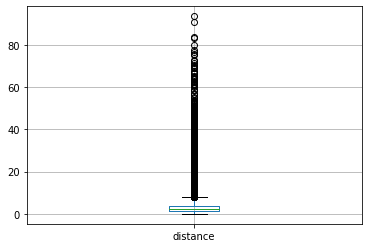

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

train.boxplot(column='distance', return_type='axes');

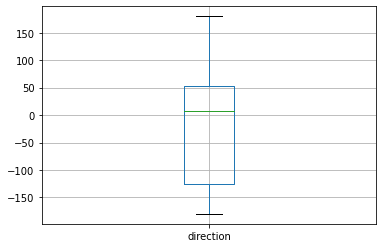

In [26]:
train.boxplot(column='direction', return_type='axes');

In [27]:
#Speed in mph
train['speed'] = train.distance / duration * 2236.936292
train.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,...,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction,speed
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,3,...,14,51,40,45.5,0.29,0.0,0.0,1.498050,99.970196,7.364930
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,6,...,12,46,37,41.5,0.35,0.0,0.0,1.804940,-117.153768,6.089799
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,1,...,19,28,16,22.0,0.00,0.0,0.0,6.383094,-159.680165,6.722493
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,4,...,6,83,66,74.5,0.40,0.0,0.0,1.485032,-172.737700,7.743408
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,3,...,26,55,38,46.5,0.00,0.0,0.0,1.188215,179.473585,6.110257


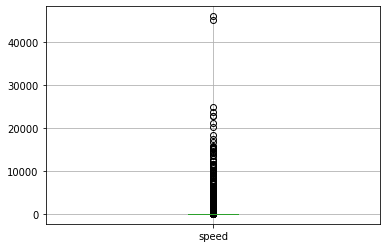

In [28]:
train.boxplot(column='speed', return_type='axes');

In [29]:
#NYS max speed limit 55mph
train = train[(train.speed < 65)]
train.drop(['speed'], axis = 1, inplace=True)

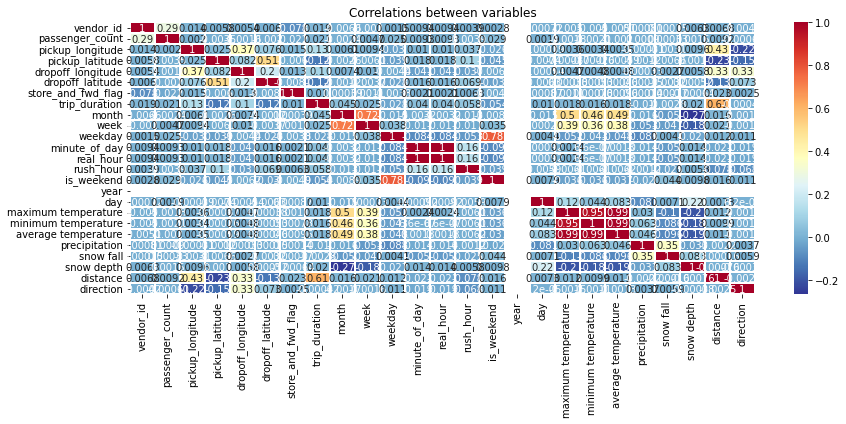

In [30]:
import seaborn as sns
#Correlations between variables
fig, ax = plt.subplots(figsize=(14,5))  
sns.heatmap(data=train.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

In [31]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,week,...,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction
count,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,...,1395757.0,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06,1.395757e+06
mean,1.534354e+00,1.662941e+00,-7.397564e+01,4.075192e+01,-7.397469e+01,4.075240e+01,5.276706e-03,6.422017e+00,3.514303e+00,1.382470e+01,...,2016.0,1.550007e+01,6.174853e+01,4.671971e+01,5.423412e+01,8.854690e-02,5.878982e-02,4.059324e-01,3.036043e+00,-1.586276e+01
std,4.988186e-01,1.313521e+00,3.326082e-02,2.639165e-02,3.195302e-02,3.034477e-02,7.244906e-02,7.801600e-01,1.680901e+00,8.559368e+00,...,0.0,8.702438e+00,1.698354e+01,1.572239e+01,1.615085e+01,2.336544e-01,9.439504e-01,2.242955e+00,3.194768e+00,1.046975e+02
min,1.000000e+00,0.000000e+00,-7.472672e+01,4.009979e+01,-7.470536e+01,4.015374e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,2016.0,1.000000e+00,1.500000e+01,-1.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.799926e+02
25%,1.000000e+00,1.000000e+00,-7.399197e+01,4.073806e+01,-7.399139e+01,4.073681e+01,0.000000e+00,5.958425e+00,2.000000e+00,7.000000e+00,...,2016.0,8.000000e+00,4.900000e+01,3.500000e+01,4.250000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.202997e+00,-1.268848e+02
50%,2.000000e+00,1.000000e+00,-7.398193e+01,4.075439e+01,-7.398002e+01,4.075472e+01,0.000000e+00,6.461468e+00,4.000000e+00,1.300000e+01,...,2016.0,1.500000e+01,6.100000e+01,4.600000e+01,5.350000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010011e+00,8.548870e+00
75%,2.000000e+00,2.000000e+00,-7.396810e+01,4.076837e+01,-7.396397e+01,4.076971e+01,0.000000e+00,6.927558e+00,5.000000e+00,2.000000e+01,...,2016.0,2.300000e+01,7.600000e+01,6.100000e+01,6.950000e+01,4.000000e-02,0.000000e+00,0.000000e+00,3.558677e+00,5.296562e+01
max,2.000000e+00,9.000000e+00,-7.309228e+01,4.169680e+01,-7.309218e+01,4.169335e+01,1.000000e+00,1.136664e+01,6.000000e+00,5.300000e+01,...,2016.0,3.100000e+01,9.200000e+01,7.500000e+01,8.300000e+01,2.310000e+00,2.730000e+01,2.200000e+01,7.143069e+01,1.800000e+02


In [32]:
#extra var: 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
Y_var = train['trip_duration']
X_var = train.drop(columns=['id', 'trip_duration'])
X_var.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,week,weekday,...,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,3,11,0,...,2016,14,51,40,45.5,0.29,0.0,0.0,1.498050,99.970196
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,23,6,...,2016,12,46,37,41.5,0.35,0.0,0.0,1.804940,-117.153768
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,1,3,1,...,2016,19,28,16,22.0,0.00,0.0,0.0,6.383094,-159.680165
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,4,14,2,...,2016,6,83,66,74.5,0.40,0.0,0.0,1.485032,-172.737700
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,3,12,5,...,2016,26,55,38,46.5,0.00,0.0,0.0,1.188215,179.473585


Test

In [33]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [34]:
#Rush hour formula takes a moment ~15s
#old
#testX = test.drop(columns=['id','vendor_id'])
#testY = test[['id']]

encoder.fit(test['store_and_fwd_flag'])
test['store_and_fwd_flag'] = encoder.transform(test['store_and_fwd_flag'])

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['month'] = test['pickup_datetime'].dt.month
test['week'] = test['pickup_datetime'].dt.week
test['weekday'] = test['pickup_datetime'].dt.weekday
test['hour'] = test['pickup_datetime'].dt.hour
test['minute'] = test['pickup_datetime'].dt.minute
test['minute_of_day'] = test['hour'] * 60 + test['minute']
test['real_hour'] = test['minute_of_day'] / 60

test['rush_hour'] = test.apply(rush_hour_f, axis=1)
test['is_weekend'] = test['weekday'] > 4
encoder.fit(test['is_weekend'])
test['is_weekend'] = encoder.transform(test['is_weekend'])

#for weather
test['year'] = test['pickup_datetime'].dt.year
test['day'] = test['pickup_datetime'].dt.day


test.drop(['minute'], axis=1, inplace=True)
test.drop(['hour'], axis=1, inplace=True)
test.drop(['pickup_datetime'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [35]:
weather["date"] = pd.to_datetime(weather["date"])
weather['year'] = weather['date'].dt.year
weather_2016 = weather[weather["year"] == 2016]
weather_2016.drop(["year"], axis=1, inplace=True)

test['date']=pd.to_datetime(test[['year','month','day']],errors='coerce')
left_merge_test = pd.merge(left=test, right=weather_2016, on="date", how="left")
test = left_merge_test.loc[:, left_merge_test.columns != 'date']

In [36]:
#Manhattan and direction formula takes a moment ~60s #old

#Haversine and direction formula takes a moment ~55s
#test['distance'] = test.apply(haversine, axis=1)
test['distance'] = test.apply(haversine, axis=1)
test['direction'] = test.apply(ft_degree, axis=1)
test.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,week,...,year,day,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,direction
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,0,6,26,...,2016,30,85,67,76.0,0.0,0.0,0.0,2.745564,-3.595224
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,0,6,26,...,2016,30,85,67,76.0,0.0,0.0,0.0,2.758373,172.278835
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,0,6,26,...,2016,30,85,67,76.0,0.0,0.0,0.0,1.305745,133.326248
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,0,6,26,...,2016,30,85,67,76.0,0.0,0.0,0.0,5.267434,-150.956833
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,0,6,26,...,2016,30,85,67,76.0,0.0,0.0,0.0,0.960540,130.260381


In [37]:
#extra var: , 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'
X_var_test = test.drop(columns=['id'])

In [38]:
X_var_test.shape

(625134, 24)

In [39]:
from sklearn.model_selection import train_test_split

trainXsplit, testXsplit, trainYsplit, testYsplit = train_test_split(X_var, Y_var, test_size=625134, random_state=42)
trainXsplit.shape, trainYsplit.shape, testXsplit.shape, testYsplit.shape

((770623, 24), (770623,), (625134, 24), (625134,))

# Model LightGBM

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395757 entries, 0 to 1458592
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1395757 non-null  object 
 1   vendor_id            1395757 non-null  int64  
 2   passenger_count      1395757 non-null  int64  
 3   pickup_longitude     1395757 non-null  float64
 4   pickup_latitude      1395757 non-null  float64
 5   dropoff_longitude    1395757 non-null  float64
 6   dropoff_latitude     1395757 non-null  float64
 7   store_and_fwd_flag   1395757 non-null  int64  
 8   trip_duration        1395757 non-null  float64
 9   month                1395757 non-null  int64  
 10  week                 1395757 non-null  int64  
 11  weekday              1395757 non-null  int64  
 12  minute_of_day        1395757 non-null  int64  
 13  real_hour            1395757 non-null  float64
 14  rush_hour            1395757 non-null  int64  
 15

In [41]:
#~317s
from sklearn.metrics import mean_squared_error as MSE
import lightgbm as lgb

lgb_params = {
    #'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000
#     ,'verbosity': 2
    }

#Training on all labeled data using the best parameters
lgb_df = lgb.Dataset(X_var, Y_var)
#lgb_df = lgb.Dataset(trainXsplit, trainYsplit)
lgb_model = lgb.train(lgb_params, lgb_df, num_boost_round=1500)

#modelX.fit(trainXsplit, trainYsplit, verbose=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.310102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8210
[LightGBM] [Info] Number of data points in the train set: 1395757, number of used features: 23
[LightGBM] [Info] Start training from score 6.422017


In [42]:
#~60s
test_col = X_var.columns
#y_pred = np.exp(lgb_model.predict(test[test_col]))
y_pred = lgb_model.predict(X_var_test[test_col])

# Submission

In [43]:
submission = pd.DataFrame({'id': test.id, 'trip_duration': np.exp(y_pred)})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,trip_duration
0,id3004672,706.877988
1,id3505355,687.124825
2,id1217141,397.440511
3,id2150126,939.311504
4,id1598245,354.606384


In [44]:
submission.shape

(625134, 2)

# Visualization and accuracy

In [45]:
#continuous df doesnt work
# lgb_cross = lgb.cv(lgb_params, lgb_df, num_boost_round=1500)

In [46]:
#from sklearn.metrics import accuracy_score
#modelX.score(X_var, Y_var)

# Sources
Tutorials
* https://python-visualization.github.io/folium/quickstart.html
* https://www.kaggle.com/dcstang/create-table-of-contents-in-a-notebook#Introduction
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
* https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html
* https://stackoverflow.com/questions/32980087/pandas-not-in-in-and-between
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
* https://stackoverflow.com/questions/53872905/iterate-over-first-n-rows-in-pandas
* https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


Datasets
* https://www.kaggle.com/c/nyc-taxi-trip-duration/data
* https://www.kaggle.com/datasets/mathijs/weather-data-in-new-york-city-2016

Other notebooks and reference data
* https://www.kaggle.com/alexisbcook/manipulating-geospatial-data
* https://www.kaggle.com/camnugent/geospatial-feature-engineering-and-visualization
* https://www.kaggle.com/quentinmonmousseau/ml-workflow-lightgbm-0-37-randomforest-0-39
* https://www.kaggle.com/brianfong192/predicting-trip-durations-with-xgboost-lb-0-433?scriptVersionId=1509647
* https://www.gps-coordinates.net/
* https://www.siferry.com/schedules.html


Extra
* https://www.sheknows.com/living/articles/1126288/man-get-hit-nyc-taxi-playing-pokemon-go/
* https://abcnews.go.com/Travel/ny-la-taxi-ride-friends-celebrating-birthday/story?id=13452198